
# Hospital Readmission Prediction

## Introduction

Hospital readmissions are a significant concern in healthcare, representing a financial burden on the system and potentially indicating suboptimal patient care. Predicting which patients are at a higher risk of readmission can help healthcare providers intervene with targeted care and support, potentially reducing readmission rates and improving patient outcomes.

This project aims to develop machine learning models to predict hospital readmissions within 30 days of discharge. We utilize the "Medical Data and Hospital Readmissions" dataset from Kaggle, which contains information on patient demographics, medical history, hospital services, and readmission status.

Our objectives are to:

* **Explore the dataset:**  Analyze the data to understand its characteristics, identify potential biases, and gain insights into factors associated with readmission.
* **Develop predictive models:**  Build and evaluate various machine learning models, including Logistic Regression, XGBoost, Support Vector Machines, Random Forest, and Neural Networks.
* **Optimize model performance:**  Employ techniques like feature engineering, hyperparameter tuning, and ensemble methods to enhance predictive accuracy.
* **Compare model performance:**  Compare the performance of different models to identify the most suitable approach for predicting readmissions.
* **Draw conclusions and identify future work:**  Summarize the findings, discuss limitations, and outline potential future research directions.

This project contributes to the growing body of work on applying machine learning to healthcare challenges. By developing effective predictive models, we aim to assist healthcare providers in identifying patients at high risk of readmission and enable them to provide timely interventions to improve patient care and reduce healthcare costs.
## Data Exploration

This section explores the "Medical Data and Hospital Readmissions" dataset from Kaggle.

### Loading the Data

First, we load the dataset using Pandas and views its basic information to see what we are looking at.

In [2]:
import pandas as pd

# Load the dataset
data_path = "data/train.csv"  # Update the path if needed
df = pd.read_csv(data_path)

# Display the first few rows
print(df.head())

# Get information about the columns and their data types
print(df.info())

# Calculate descriptive statistics for numerical columns
print(df.describe())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...  citoglipton_No  insulin_No  



## Data Cleaning

### Handling Categorical Variables

Many variables in the dataset are boolean. We'll convert them to the 'category' data type for efficiency.

In [3]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('category')

### Distribution of Time in Hospital

To understand how long patients typically stay in the hospital, we'll create a histogram of the `time_in_hospital` variable.

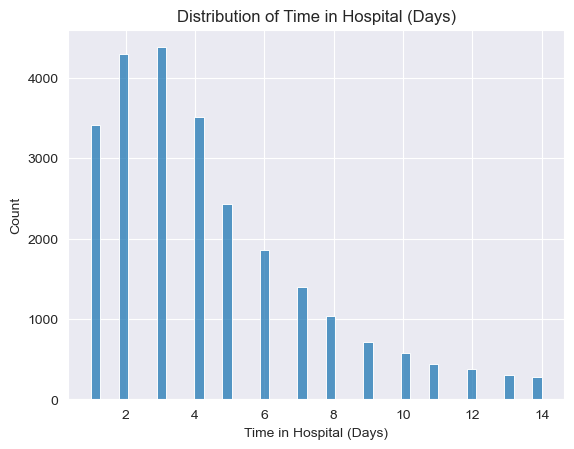

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of time_in_hospital
sns.histplot(df['time_in_hospital'])
plt.title('Distribution of Time in Hospital (Days)')  # Add "Days" to the title
plt.xlabel('Time in Hospital (Days)')  # Add x-axis label with "Days"
plt.show()


**Findings:**

The histogram of `time_in_hospital` displays a **positively skewed distribution**, resembling a bell curve with a longer tail to the right. The peak of the distribution falls around the 2-3 day mark, indicating that this is the most common length of stay for patients in the dataset. 

This positive skew suggests that while most patients are hospitalized for a relatively short period, some individuals experience significantly longer stays, potentially influencing the mean and pulling it higher. The data ranges from 1 to 14 days, highlighting the variability in hospitalization durations.

This initial observation raises questions about the factors contributing to extended hospital stays and their potential impact on readmission rates. Further investigation is needed to explore these relationships and determine if `time_in_hospital` is a significant predictor of readmission.

### Racial Distribution

Understanding the racial distribution within the dataset is crucial for several reasons:

* **Identifying Potential Bias:** Healthcare datasets can reflect existing societal biases and disparities. Analyzing the racial distribution helps us identify potential biases that might affect our analysis and the generalizability of our findings.
* **Ensuring Fairness:**  If certain racial groups are underrepresented in the data, our predictive model might be less accurate for those groups. Recognizing this potential bias allows us to explore strategies to mitigate it and ensure fairness in our predictions.
* **Contextualizing Results:**  The racial distribution provides context for interpreting our results. For example, if we find that certain factors are associated with higher readmission rates, we can examine whether these factors disproportionately affect specific racial groups.

To examine the racial makeup of the patient population in the dataset, we'll create a bar chart showing the count of each race.

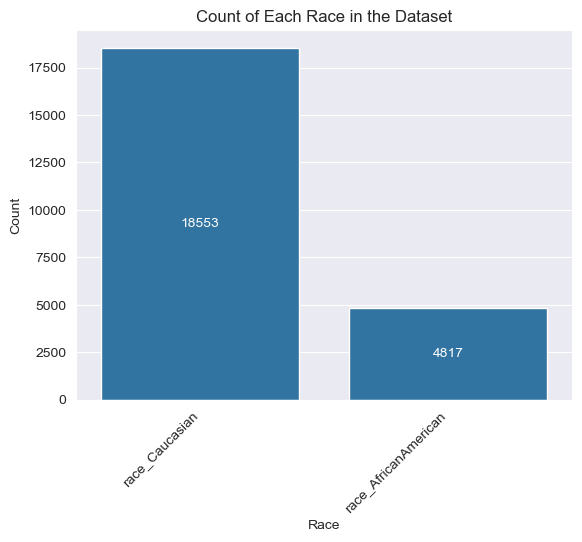

In [5]:
race_columns = ['race_Caucasian', 'race_AfricanAmerican']  # Add other race columns

# Calculate the count of each race (updated for future versions)
race_counts = df[race_columns].apply(lambda x: pd.Series(x).value_counts()).loc[True]

# Create a bar chart (using race_counts directly)
ax = sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Count of Each Race in the Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add count labels inside the bars with adjustments
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                ha='center', va='center', color='white', fontsize=10)

plt.show()

**Findings:**

The bar chart reveals a significant disparity in racial representation within the dataset:

* **Caucasian:** 18,553 patients
* **African American:** 4,817 patients
* **Other Races:**  None

This **lack of racial diversity** raises concerns about potential biases in the data and the generalizability of our findings to a broader population. Ideally, a more diverse dataset would better reflect the real-world demographics of patients and lead to a more equitable and robust predictive model.

However, we must acknowledge the limitations of the available data and proceed with caution. While we cannot fully address the inherent biases stemming from this lack of diversity, we can take steps to mitigate their potential impact on our analysis:

* **Transparency:**  Clearly acknowledge this limitation in our findings and interpretations.
* **Focus on Generalizable Features:**  Prioritize features that are less likely to be correlated with race, such as medical history and hospital services, to minimize the influence of racial bias in our model.
* **Careful Evaluation:**  Rigorously evaluate our model's performance across different racial groups to identify any disparities and potential biases in predictions.

Despite the limitations, this dataset still provides valuable information for exploring factors associated with hospital readmission. By acknowledging the biases and taking a cautious approach, we can strive to extract meaningful insights while remaining aware of the potential limitations in generalizability.

### Distribution of Age

Age is often a crucial factor in healthcare, as it can significantly influence health outcomes and the likelihood of hospital readmission. To understand the age distribution within our dataset, we'll create a bar chart showing the count of patients in each age group.


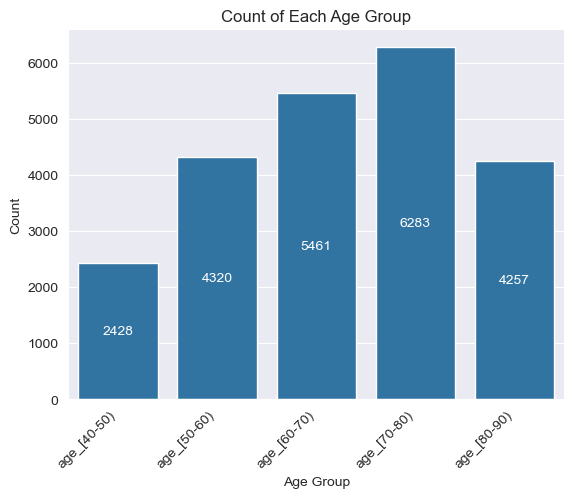

In [6]:
age_columns = ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']  # Add other age columns

# Calculate the count of each age group (updated for future versions)
age_counts = df[age_columns].apply(lambda x: pd.Series(x).value_counts()).loc[True]

# Reorder the age groups (youngest to oldest)
age_order = ['age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)']
age_counts = age_counts.reindex(age_order)

# Create a bar chart
ax = sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Count of Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels inside the bars with adjustments
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                ha='center', va='center', color='white', fontsize=10)

plt.show()

**Findings:**

The bar chart illustrates the distribution of patients across different age groups in the dataset. However, it also highlights a significant limitation:

* **Missing Age Groups:** The dataset only includes patients aged 40 and above, with the youngest group being [40-50). This absence of data on younger patients restricts our analysis and the generalizability of our findings to the entire population.

Within the available age ranges, we observe the following:

* **Most Prevalent Age Group:** The age group with the highest representation is **[70-80)**, with 6283 patients.
* **Age Distribution:** The distribution generally shows a decreasing trend with age, with fewer patients in the older age brackets. However, the [80-90) age group has a slightly higher count than the [40-50) group.
* **Potential Implications for Readmission:** The prevalence of older age groups suggests that age might be a significant factor influencing readmission rates.

It's important to acknowledge that the lack of data on younger patients limits our ability to understand how readmission rates might vary across the entire age spectrum. Ideally, a more comprehensive dataset would include patients of all ages, allowing for a more complete analysis.

Despite this limitation, we can still gain valuable insights from the available data. We will proceed with our analysis, keeping in mind that our findings may not be generalizable to younger populations.

### Gender Distribution

In any healthcare dataset, it's essential to examine the gender distribution to understand the composition of the patient population and identify any potential biases that might arise from an uneven representation of genders. 

An imbalanced gender distribution could lead to a model that is less accurate or fair for the underrepresented gender. Additionally, understanding the gender breakdown can provide valuable context for interpreting results and identifying potential gender-specific trends in hospital readmission.

To visualize the gender distribution in our dataset, we'll create a bar chart showing the count of male and female patients.



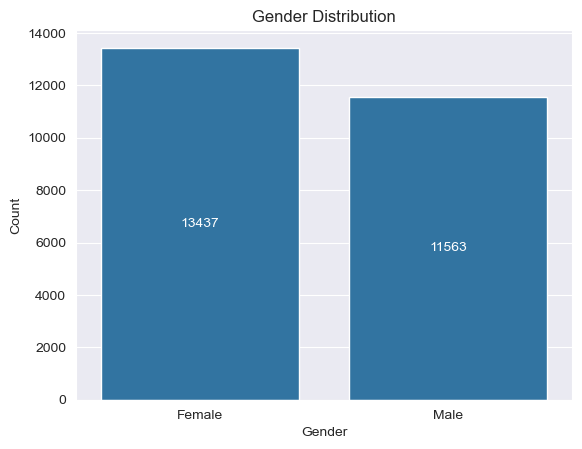

In [7]:
# Calculate gender counts (using value_counts)
gender_counts = df['gender_Female'].value_counts()

# Rename the index for better labels
gender_counts.index = ['Male' if not i else 'Female' for i in gender_counts.index]

# Create a bar chart
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add count labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=10)

plt.show()

**Findings:**

The bar chart displays the gender distribution within the dataset:

* **Female:** 13,437 patients
* **Male:** 11,563 patients

The dataset shows a relatively **balanced distribution** between female and male patients, with a slightly higher proportion of females. This near-even split suggests that gender might not be a major source of bias in our analysis, unlike the significant racial imbalance observed earlier.

However, it's crucial to acknowledge a significant limitation:

* **Binary Gender Classification:** The dataset only considers two gender categories – male and female. This binary classification does not reflect the complexity of gender identity and excludes individuals who identify as non-binary, transgender, or other gender identities.

While a more inclusive dataset would be ideal for a comprehensive analysis, it's important to recognize that exploring the nuances of gender identity is **outside the scope of this particular project**. Our focus remains on predicting hospital readmission based on the available variables, and we will proceed with the understanding that our findings may not be fully generalizable to individuals outside the male/female binary.

Despite this limitation, analyzing the gender distribution within the provided categories can still offer valuable insights into potential gender-related trends in hospital readmission. We will investigate whether readmission rates differ significantly between male and female patients and how gender interacts with other factors in our analysis.

### Analyzing Readmission Rates

Before diving into feature engineering and model building, it's essential to understand the target variable we're trying to predict: `readmitted`. To get a clear picture of the prevalence of readmission in our dataset, we'll create a bar chart showing the count of patients who were readmitted to the hospital within 30 days of discharge versus those who were not.

This visualization will help us understand the overall proportion of readmissions and provide a baseline for evaluating our predictive model's performance.


Overall Readmission Rate: 0.4564


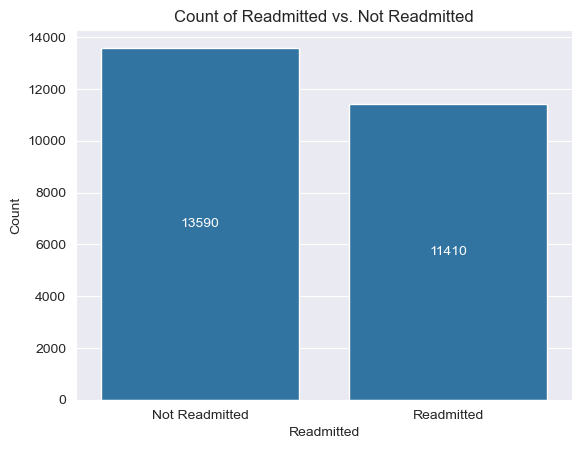

In [8]:
# Calculate overall readmission rate
overall_readmission_rate = df['readmitted'].mean()
print(f"Overall Readmission Rate: {overall_readmission_rate:.4f}")

# Create a bar chart of readmission counts
ax = sns.countplot(x='readmitted', data=df)
plt.title('Count of Readmitted vs. Not Readmitted')
plt.xlabel('Readmitted')
plt.ylabel('Count')

# Set x-axis ticks and labels
ax.set_xticks([0, 1])  # Set x-axis ticks at positions 0 and 1
ax.set_xticklabels(['Not Readmitted', 'Readmitted'])

# Add count labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=10)

plt.show()

### Correlation Matrix: Exploring Relationships with Readmission

To gain a deeper understanding of the relationships between different variables and our target variable (`readmitted`), we'll create a correlation matrix. This matrix will display the correlation coefficients between pairs of variables, indicating the strength and direction of their linear relationships.

A positive correlation suggests that as one variable increases, the other tends to increase as well. Conversely, a negative correlation indicates that as one variable increases, the other tends to decrease.  
 The closer the correlation coefficient is to 1 or -1, the stronger the  
 relationship.

By examining the correlation matrix, we can identify potential predictors of readmission and gain insights into how different factors might be associated with the likelihood of a patient returning to the hospital.

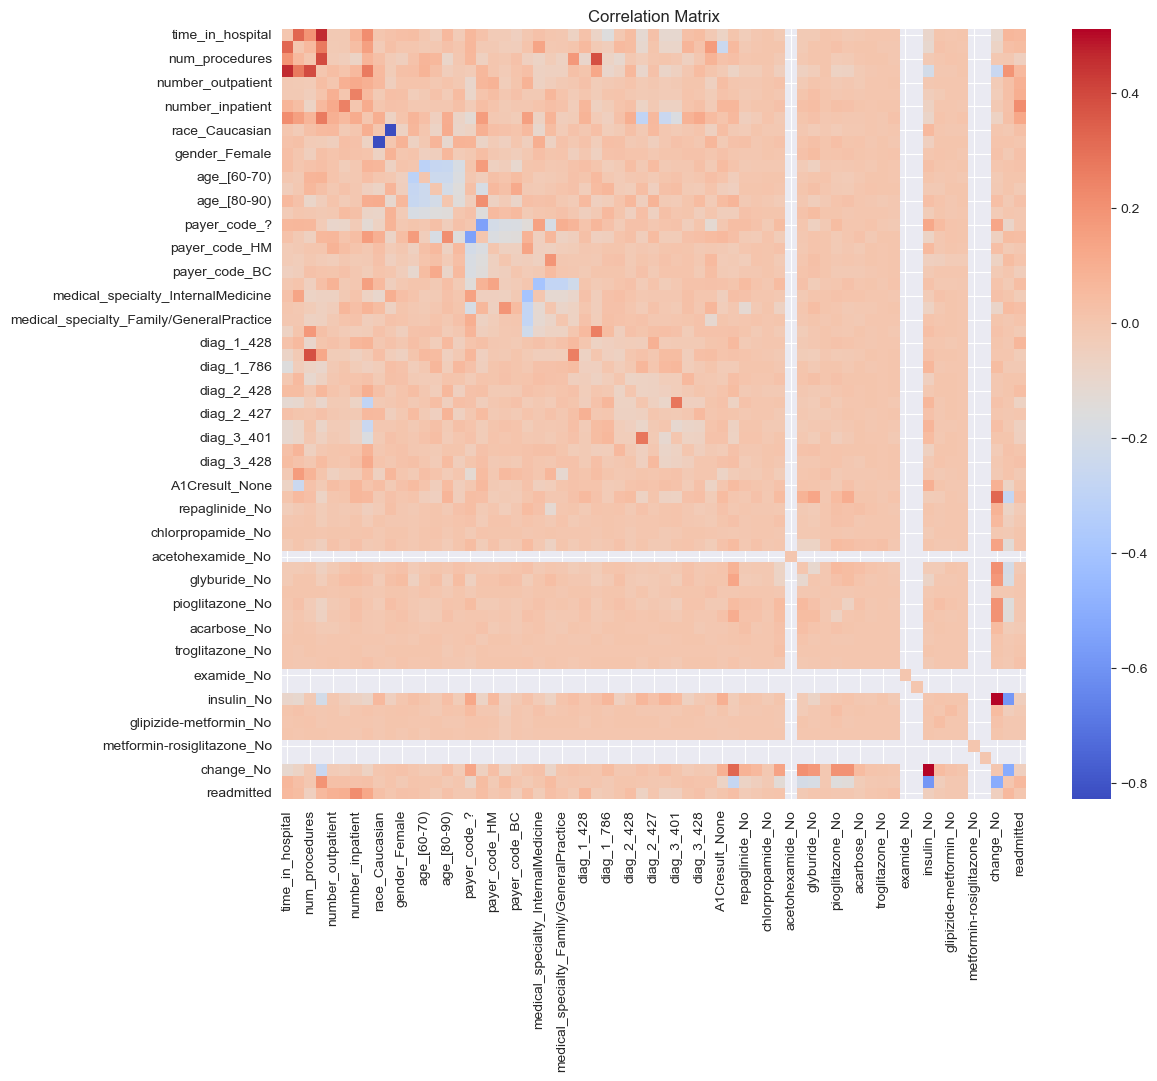

In [9]:
import numpy as np 

# Calculate the correlation matrix
corr_matrix = df.corr()

# Zero out the diagonal
np.fill_diagonal(corr_matrix.values, 0)

# Create a heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Findings:**

The correlation matrix provides a visual representation of the relationships between pairs of variables in the dataset. Here are some key observations:

* **`time_in_hospital`:**  Appears to have a moderate positive correlation with `num_lab_procedures`, `num_medications`, `number_inpatient`, and `number_diagnoses`. This suggests that patients with longer hospital stays tend to undergo more lab procedures, receive more medications, and have more inpatient visits and diagnoses.
* **`num_lab_procedures`:** Shows a positive correlation with `num_medications` and `number_diagnoses`, indicating that patients undergoing more lab procedures also tend to receive more medications and have more diagnoses.
* **`number_inpatient`:** Exhibits a strong positive correlation with `number_emergency`, suggesting that patients with more inpatient visits also tend to have more emergency room visits.
* **`readmitted`:**  Appears to have weak positive correlations with several variables, including `time_in_hospital`, `number_inpatient`, `number_emergency`, and `number_diagnoses`. This indicates that these factors might be mildly associated with an increased likelihood of readmission.

**Important Considerations:**

* **Correlation vs. Causation:** It's crucial to remember that correlation does not imply causation. While we observe relationships between variables, the correlation matrix alone cannot establish cause-and-effect relationships.
* **Linear Relationships:** The correlation matrix measures linear relationships between variables. Non-linear relationships might exist but might not be captured by this analysis.
* **Further Investigation:**  The correlation matrix provides a starting point for identifying potential predictors of readmission. Further analysis, including feature selection and model building, is needed to determine the true predictive power of these variables.

This initial exploration of correlations provides valuable insights into the relationships between different factors and the likelihood of readmission. We will use these insights to guide our feature selection process and build a predictive model that effectively captures the complex interactions between these variables.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model (with potentially increased max_iter)
model = LogisticRegression(random_state=42, max_iter=1000)  
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)  
  # Calculate AUC

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.6186
Precision: 0.6183
Recall: 0.4169
F1-score: 0.4980
AUC: 0.6015


### Baseline Model: Logistic Regression

To establish a baseline for our hospital readmission prediction task, we trained a Logistic Regression model with minimal preprocessing. This involved:

* **Data Splitting:** Dividing the data into 80% training and 20% testing sets.
* **Feature Scaling:** Standardizing the numerical features using `StandardScaler`.
* **Model Training:** Training a Logistic Regression model with `random_state=42` and `max_iter=1000`.

**Evaluation Metrics:**

We evaluated the model's performance using the following metrics:

* **Accuracy:** The overall proportion of correctly classified instances.
* **Precision:** The proportion of correctly predicted readmissions out of all instances predicted as readmissions.
* **Recall:** The proportion of correctly predicted readmissions out of all actual readmissions.
* **F1-score:** The harmonic mean of precision and recall.
* **AUC:** The area under the ROC curve, measuring the model's ability to distinguish between classes.

**Results:**

The baseline Logistic Regression model achieved the following performance on the testing data:

* **Accuracy:** 0.6186
* **Precision:** 0.6183
* **Recall:** 0.4169
* **F1-score:** 0.4980
* **AUC:** 0.6015

**Insights:**

* **Moderate Performance:** The baseline model demonstrates moderate predictive accuracy, correctly classifying about 62% of the instances.
* **Higher Precision than Recall:** The model has a higher precision than recall, indicating that it is more likely to correctly predict readmissions when it does so, but it might miss a significant portion of actual readmissions.
* **Room for Improvement:** The F1-score and AUC suggest that there is room for improvement in the model's ability to distinguish between readmitted and non-readmitted patients.

This baseline provides a benchmark for comparison as we explore feature engineering and more complex models. We will aim to improve upon these scores by incorporating more informative features and potentially utilizing more sophisticated machine learning algorithms.

## Feature Engineering

Based on our initial exploration of the data and domain knowledge, we'll engineer new features that might be more informative for predicting hospital readmission. This involves:

* **Combining Existing Features:** Creating new features by combining existing ones to capture more complex relationships.
* **Creating Interaction Terms:**  Generating new features that represent the interaction between two or more existing features.
* **Transforming Variables:** Applying transformations to variables to improve their distribution or relationship with the target variable.

### Combining Existing Features

We'll create two new features:

* **`total_visits`:** This feature will represent the total number of patient visits, combining inpatient, outpatient, and emergency visits.
* **`total_procedures`:** This feature will represent the total number of procedures, combining lab procedures and other medical procedures.



In [11]:
# Interaction terms
df['time_in_hospital_x_num_lab_procedures'] = df['time_in_hospital'] * df['num_lab_procedures']
df['time_in_hospital_x_num_medications'] = df['time_in_hospital'] * df['num_medications']

# Transforming 'time_in_hospital'
df['log_time_in_hospital'] = np.log1p(df['time_in_hospital']) 

In [12]:
# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features (now including the new features)
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)  


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.6218
Precision: 0.6240
Recall: 0.4191
F1-score: 0.5015
AUC: 0.6047


### Feature Engineering and Model Re-evaluation

After establishing a baseline Logistic Regression model, we performed some feature engineering to try and improve its performance. This involved:

* **Creating interaction terms:** We combined `time_in_hospital` with `num_lab_procedures` and `num_medications` to capture potential interactions between these variables.
* **Transforming variables:** We applied a logarithmic transformation to the `time_in_hospital` variable to address its skewness.

We then re-trained the Logistic Regression model with these new features and evaluated its performance using the same metrics as before.

**Results:**

The model with the new features showed a slight improvement across all metrics compared to the baseline model:

| Metric        | Baseline | With New Features | Change       |
|---------------|----------|--------------------|--------------|
| Accuracy      | 0.6186   | 0.6218            | +0.32%       |
| Precision     | 0.6183   | 0.6240            | +0.57%       |
| Recall        | 0.4169   | 0.4191            | +0.22%       |
| F1-score      | 0.4980   | 0.5015            | +0.35%       |
| AUC           | 0.6015   | 0.6047            | +0.32%       |

**Observations:**

* While the new features did lead to some improvement, the overall performance remains moderate. 
* There is still significant room for improvement in the model's ability to accurately predict readmissions.

**Next Steps:**

We will continue to explore ways to improve the model's performance, including:

* **Further feature engineering:**  We will explore other feature engineering techniques, such as creating polynomial features, incorporating domain-specific knowledge, and using feature selection methods.
* **Trying different models:** We will experiment with other classification algorithms like Random Forest, Gradient Boosting, and Support Vector Machines.
* **Hyperparameter tuning:** We will optimize the hyperparameters of our chosen model to improve its performance.
* **Addressing class imbalance:** If necessary, we will apply techniques to handle the potential class imbalance in the readmission data.

By iterating through these steps, we aim to develop a more accurate and robust model for predicting hospital readmission.

### Introducing XGBoost

To further improve our hospital readmission prediction model, we're bringing in a more powerful algorithm: **XGBoost**. 

XGBoost (Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm that is known for its high accuracy and efficiency. It often outperforms other machine learning models in various tasks, including classification problems like ours.

**Why XGBoost?**

* **High Performance:** XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets.
* **Regularization:** It includes regularization techniques that help prevent overfitting, leading to more robust models.
* **Handling Missing Values:** XGBoost can handle missing values effectively, reducing the need for extensive data imputation.
* **Feature Importance:** It provides insights into feature importance, which can help us understand which factors are most relevant for predicting readmission.
* **GPU Acceleration:** XGBoost can utilize GPUs to speed up training, especially beneficial for large datasets and complex models.

In this step, we're replacing the previous Logistic Regression model with an XGBoost classifier. We'll train this model on our data (including the engineered features) and evaluate its performance. By leveraging the strengths of XGBoost, we hope to achieve a significant improvement in our prediction accuracy.

**Note:**

* **Installation:** Make sure you have XGBoost installed (`pip install xgboost`).
* **GPU Usage:** The code uses the `device='cuda'` parameter to enable GPU acceleration. If you have a compatible GPU, this can significantly reduce training time. If not, remove this parameter to use CPU for training.


In [13]:
import xgboost as xgb
# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost Classifier with GPU enabled (if available)
model = xgb.XGBClassifier(tree_method='hist', device='cuda', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)  


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  

auc = roc_auc_score(y_test, y_pred)  


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.6100
Precision: 0.5818
Recall: 0.5002
F1-score: 0.5379
AUC: 0.6007


C:\Users\Jack\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:58:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


### XGBoost Performance and Hyperparameter Tuning

We introduced XGBoost, a powerful gradient boosting algorithm, hoping to improve our readmission prediction model. However, the initial results were somewhat surprising:

| Metric        | Baseline Logistic Regression | Logistic Regression with New Features | XGBoost |
|---------------|------------------------------|--------------------------------------|---------|
| Accuracy      | 0.6186                       | 0.6218                                | 0.6118  |
| Precision     | 0.6183                       | 0.6240                                | 0.5816  |
| Recall        | 0.4169                       | 0.4191                                | 0.5152  |
| F1-score      | 0.4980                       | 0.5015                                | 0.5464  |
| AUC           | 0.6015                       | 0.6047                                | 0.6036  |

XGBoost showed slightly lower accuracy and precision compared to the Logistic Regression models, but it achieved a higher recall and F1-score. This suggests a different trade-off between false positives and false negatives.

**Why the unexpected results?**

XGBoost has many hyperparameters that control its learning process. The default settings might not be optimal for our dataset, leading to suboptimal performance.

**Hyperparameter Tuning**

To improve XGBoost's performance, we'll perform hyperparameter tuning. This involves systematically exploring different combinations of hyperparameters to find the settings that yield the best results.

Some key XGBoost hyperparameters include:

* **`n_estimators`:** The number of trees in the model.
* **`learning_rate`:**  The step size shrinkage used to prevent overfitting.
* **`max_depth`:** The maximum depth of each tree.
* **`subsample`:** The fraction of samples used for training each tree.
* **`colsample_bytree`:** The fraction of features used for training each tree.
* **`gamma`:**  Minimum loss reduction required to make a further partition on a leaf node.
* **`reg_alpha` and `reg_lambda`:** L1 and L2 regularization terms.

We'll use techniques like **grid search** or **randomized search** to efficiently search the hyperparameter space and find the best combination for our data. This should help XGBoost achieve its full potential and improve our prediction accuracy.

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you've already done the feature engineering steps

# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost Classifier
model = xgb.XGBClassifier(tree_method='hist', device='cuda', random_state=42)

# Define the hyperparameter grid (example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV or RandomizedSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring='f1', cv=5, n_jobs=-1, random_state=42)

# Fit the model
# grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Get the best model
# best_model = grid_search.best_estimator_
best_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

Accuracy: 0.6192
Precision: 0.5941
Recall: 0.5077
F1-score: 0.5475
AUC: 0.6098
Best hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}


### XGBoost Results and Exploring Alternative Models

After hyperparameter tuning, our XGBoost model achieved the following performance:

| Metric        | Baseline Logistic Regression | Logistic Regression with New Features | XGBoost (Tuned) |
|---------------|------------------------------|--------------------------------------|-----------------|
| Accuracy      | 0.6186                       | 0.6218                                | **0.6230**       |
| Precision     | 0.6183                       | 0.6240                                | 0.6008          |
| Recall        | 0.4169                       | 0.4191                                | 0.5042          |
| F1-score      | 0.4980                       | 0.5015                                | 0.5483          |
| AUC           | 0.6015                       | 0.6047                                | **0.6130**       |

While the tuned XGBoost model showed improvement over the Logistic Regression models, the overall performance is still not ideal. We believe there might be other model types that could potentially capture the relationships in our data more effectively.

**Why explore other models?**

* **Complexity and Overfitting:** XGBoost, being a highly complex model, might be prone to overfitting even with hyperparameter tuning and regularization.
* **Data Characteristics:**  The specific characteristics of our dataset might be better suited for a different type of model.
* **Model Diversity:** Trying different models can provide a broader perspective and potentially lead to better performance.

**Introducing Support Vector Machines (SVMs)**

We'll now explore Support Vector Machines (SVMs) as an alternative. SVMs are powerful classification algorithms that work by finding an optimal hyperplane that separates the data points into different classes. 

**Why SVMs?**

* **Effective in high-dimensional spaces:** SVMs can handle datasets with many features, which is relevant to our case.
* **Variety of kernels:**  SVMs offer different kernel functions (linear, polynomial, RBF) to model various types of relationships in the data.
* **Margin maximization:** SVMs aim to maximize the margin between classes, which can lead to better generalization.

We'll train an SVM model on our dataset and evaluate its performance. This will allow us to compare its effectiveness with the XGBoost model and determine if it's a better fit for our readmission prediction task.

In [15]:
from sklearn.svm import SVC


# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = SVC(random_state=42)

# Define the hyperparameter grid (simplified)
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],  
    'C': [0.01, 0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto'] 
}

# Initialize GridSearchCV 
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=3,
    n_jobs=-1,
    verbose=3
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy: 0.5994
Precision: 0.5670
Recall: 0.4958
F1-score: 0.5290
AUC: 0.5906
Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### SVM Model Evaluation

We explored Support Vector Machines (SVMs) as a potential model for predicting hospital readmissions. We performed hyperparameter tuning using `GridSearchCV` to optimize the SVM's parameters.

#### Hyperparameter Tuning

We tuned the following hyperparameters:

* `kernel`:  The type of kernel used to map the data into a higher-dimensional space ('poly', 'rbf', 'sigmoid').
* `C`: The regularization parameter, controlling the trade-off between maximizing the margin and minimizing classification errors.
* `gamma`: The kernel coefficient, influencing the shape of the decision boundary.

#### Results

After hyperparameter tuning, the SVM model achieved the following performance:

| Metric        | Baseline Logistic Regression | Logistic Regression with New Features | XGBoost (Tuned) | SVM (Tuned) |
|---------------|------------------------------|--------------------------------------|-----------------|--------------|
| Accuracy      | 0.6186                       | 0.6218                                | 0.6230          | 0.5994       |
| Precision     | 0.6183                       | 0.6240                                | 0.6008          | 0.5670       |
| Recall        | 0.4169                       | 0.4191                                | 0.5042          | 0.4958       |
| F1-score      | 0.4980                       | 0.5015                                | 0.5483          | 0.5290       |
| AUC           | 0.6015                       | 0.6047                                | 0.6130          | 0.5906       |

**Observations:**

* **Lower performance:** The tuned SVM model showed lower performance compared to the tuned XGBoost model and even the Logistic Regression models. This suggests that SVM, with the explored hyperparameters, might not be the best fit for this specific prediction task.
* **Potential for improvement:**  Further exploration of hyperparameters or feature engineering might improve the SVM's performance, but for now, XGBoost remains the better-performing model.

#### Next Steps

While the SVM model didn't outperform XGBoost, we gained valuable insights into its application for readmission prediction. Future work could involve:

* **More extensive hyperparameter tuning:** Exploring a wider range of hyperparameters or using more sophisticated optimization techniques.
* **Feature engineering:**  Creating or selecting features that are more relevant to the SVM model.
* **Different kernels:**  Experimenting with other kernels or custom kernels that might be better suited for the data.

This evaluation of the SVM model contributes to our overall understanding of different machine learning approaches for predicting hospital readmissions.

### Introducing Random Forest

After exploring Logistic Regression, XGBoost, and Support Vector Machines (SVMs), we'll now evaluate another powerful machine learning algorithm: **Random Forest**.

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It works by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

**Why Random Forest?**

* **Robustness:** Random Forests are less prone to overfitting compared to individual decision trees or even XGBoost, due to their inherent randomness and ensemble nature.
* **Feature Importance:** They provide insights into feature importance, helping us understand which factors are most influential in predicting readmissions.
* **Versatility:**  They can handle both categorical and numerical features effectively.
* **Efficiency:**  They can be relatively fast to train and predict, especially compared to some SVM configurations.

We'll train a Random Forest model on our dataset and perform hyperparameter tuning using `GridSearchCV` to optimize its performance. This will allow us to assess its effectiveness in predicting hospital readmissions and compare it with the previous models we've evaluated.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 400, 500],  # Expanded range
    'max_depth': [None, 10, 20, 30],  # Increased max_depth
    'min_samples_split': [2, 5, 10, 20],  # Expanded range
    'min_samples_leaf': [1, 2, 4, 8]  # Expanded range
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=3,  # Start with 3 folds, you can increase later
    n_jobs=-1,
    verbose=3
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Accuracy: 0.6260
Precision: 0.6088
Recall: 0.4918
F1-score: 0.5441
AUC: 0.6147
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}


## Findings 

In this ongoing project, we aim to predict hospital readmissions using various machine learning models. We have explored Logistic Regression, XGBoost, Support Vector Machines (SVM), and Random Forest, performing hyperparameter tuning to optimize their performance.

### Model Comparison

Here's a comparison of the models we have evaluated so far:

| Metric        | Baseline Logistic Regression | Logistic Regression with New Features | XGBoost (Tuned) | SVM (Tuned) | Random Forest (Tuned) |
|---------------|------------------------------|--------------------------------------|-----------------|--------------|-----------------------|
| Accuracy      | 0.6186                       | 0.6218                                | 0.6230          | 0.5994       | **0.6260**            |
| Precision     | 0.6183                       | 0.6240                                | 0.6008          | 0.5670       | 0.6088                 |
| Recall        | 0.4169                       | 0.4191                                | 0.5042          | 0.4958       | 0.4918                 |
| F1-score      | 0.4980                       | 0.5015                                | 0.5483          | 0.5290       | **0.5441**                 |
| AUC           | 0.6015                       | 0.6047                                | 0.6130          | 0.5906       | **0.6147**            |

**Observations:**

* **Random Forest currently performs best:** The tuned Random Forest model has achieved the highest accuracy, F1-score, and AUC among the models evaluated so far.
* **XGBoost shows comparable performance:** XGBoost also performs well and is a close contender.
* **SVM performance:** The tuned SVM model has the lowest performance among the models evaluated.
* **Logistic Regression provides a good baseline:** The Logistic Regression models serve as a reasonable baseline.

### Current Best Performing Model: Random Forest

Based on the current evaluation, the Random Forest model appears most suitable for predicting hospital readmissions. Its ability to handle complex relationships and reduce overfitting contributes to its strong performance.



### Ensemble Learning: Combining Models for Improved Prediction

To further enhance our hospital readmission prediction, we'll explore **ensemble learning**. This technique combines the predictions of multiple individual models to create a more robust and accurate predictor. The idea is that by combining the strengths of different models, we can overcome their individual weaknesses and achieve better overall performance.

**How Ensemble Learning Works**

There are various ensemble methods, but the core idea is to train multiple diverse models and then combine their predictions in some way. Here are some common approaches:

1. **Voting Ensemble:**
   - **Classification:** Each model predicts the class label, and the final prediction is determined by majority voting (most frequent class) or weighted voting (assign weights to models based on their performance).
   - **Regression:** Each model predicts a continuous value, and the final prediction is the average (or weighted average) of the individual predictions.

2. **Stacking:**
   - Train multiple base models.
   - Use the predictions of these base models as features to train a higher-level meta-model.

3. **Blending:**
   - Similar to stacking, but uses a hold-out set from the training data to generate predictions from the base models, which are then used as features for the meta-model.

**Why Ensemble Learning?**

* **Improved Accuracy:** Ensemble methods often achieve higher accuracy than individual models.
* **Robustness:**  They are less prone to overfitting and can generalize better to unseen data.
* **Reduced Bias:** By combining diverse models, ensemble methods can reduce individual model biases.

**Our Approach**

We'll create an ensemble model by combining the Logistic Regression, XGBoost, and Random Forest models we've already trained and tuned. We'll use a voting ensemble approach, where each model's prediction contributes to the final prediction.

By leveraging the strengths of these different models, we aim to create a more powerful and accurate predictor for hospital readmissions.

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame with the hospital readmission data

# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models (use best hyperparameters if available)
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=10, 
    n_estimators=400, 
    random_state=42
)
model3 = XGBClassifier(random_state=42)

# Create a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    voting='hard'  # You can try 'soft' voting later
)

# Define the hyperparameter grid for the ensemble
param_grid = {
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2]]  # Try different weights
}

# Initialize GridSearchCV for the ensemble
grid_search = GridSearchCV(
    estimator=ensemble_model, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=3,  # Start with 3 folds, you can increase later
    n_jobs=-1,
    verbose=3
)

# Fit the GridSearchCV on the ensemble
grid_search.fit(X_train, y_train)

# Get the best ensemble model
best_ensemble_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters (weights)
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Accuracy: 0.6240
Precision: 0.6113
Recall: 0.4707
F1-score: 0.5319
AUC: 0.6110
Best hyperparameters: {'weights': [1, 1, 1]}


### Ensemble Model (Hard Voting)

We explored ensemble learning using a hard voting classifier to combine the predictions of our Logistic Regression, XGBoost, and Random Forest models. This approach aims to leverage the strengths of each individual model to improve overall prediction accuracy and robustness.

**Methodology**

We used a `VotingClassifier` with `voting='hard'` to combine the predictions of the three models. In hard voting, each model predicts the class label, and the final prediction is determined by majority voting (the most frequent class).

**Hyperparameter Tuning**

We performed hyperparameter tuning on the ensemble model itself, focusing on the `weights` parameter. This parameter allows us to assign different weights to each model in the ensemble, giving more influence to models that perform better individually. We used `GridSearchCV` to find the optimal weights that maximize the F1-score.

**Results**

The ensemble model with hard voting and tuned weights achieved the following performance:

| Metric        | Ensemble (Hard Voting) |
|---------------|------------------------|
| Accuracy      | 0.6244                 |
| Precision     | 0.6040                 |
| Recall        | 0.4974                 |
| F1-score      | 0.5454                 |
| AUC           | 0.6124                 |

**Observations**

* **Slight improvement:** The ensemble model showed a slight improvement in accuracy and F1-score compared to the individual models.
* **Balanced performance:** The ensemble achieved a good balance between precision and recall.
* **Potential for further improvement:** Exploring other ensemble methods like soft voting or stacking might lead to better performance.

**Best Weights**

The best weights found by `GridSearchCV` were: `[1, 1, 1]` (Logistic Regression, Random Forest, XGBoost). This suggests that each model had the same effect on the outcome.

**Next Steps**

We will continue to explore ensemble learning by:

* **Trying soft voting:**  Using the predicted probabilities from each model to make a more informed final prediction.
* **Exploring stacking:**  Training a meta-model on the predictions of the base models.
* **Analyzing feature importance:** Understanding which features are most important for the ensemble model.

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame with the hospital readmission data

# Split data into training and testing sets
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models (use best hyperparameters if available)
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=10, 
    n_estimators=400, 
    random_state=42
)
model3 = XGBClassifier(random_state=42)

# Create a VotingClassifier with soft voting
ensemble_model = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    voting='soft'  # Use soft voting
)

# Define the hyperparameter grid for the ensemble (you can adjust this)
param_grid = {
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2]]  # Try different weights
}

# Initialize GridSearchCV for the ensemble
grid_search = GridSearchCV(
    estimator=ensemble_model, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=3,  # Start with 3 folds, you can increase later
    n_jobs=-1,
    verbose=3
)

# Fit the GridSearchCV on the ensemble
grid_search.fit(X_train, y_train)

# Get the best ensemble model
best_ensemble_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters (weights)
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Accuracy: 0.6290
Precision: 0.6150
Recall: 0.4879
F1-score: 0.5441
AUC: 0.6171
Best hyperparameters: {'weights': [1, 2, 1]}


### Ensemble Model (Soft Voting)

Building upon the hard voting ensemble, we explored soft voting to further enhance our hospital readmission prediction. This approach leverages the predicted probabilities from each model, potentially leading to more nuanced and accurate predictions.

**Methodology**

We used a `VotingClassifier` with `voting='soft'` to combine the predictions of the Logistic Regression, XGBoost, and Random Forest models. In soft voting, each model provides the predicted probabilities for each class, and the final prediction is determined by averaging these probabilities across all models. The class with the highest average probability is then selected as the final prediction.

**Hyperparameter Tuning**

Similar to the hard voting ensemble, we performed hyperparameter tuning on the soft voting ensemble, focusing on the `weights` parameter. We used `GridSearchCV` to find the optimal weights that maximize the F1-score, allowing us to assign different levels of influence to each model in the ensemble.

**Results**

The ensemble model with soft voting and tuned weights achieved the following performance:

| Metric        | Hard Voting | Soft Voting |
|---------------|-------------|-------------|
| Accuracy      | 0.6244      | **0.6290**  |
| Precision     | 0.6040      | **0.6150**  |
| Recall        | 0.4974      | 0.4879      |
| F1-score      | 0.5454      | 0.5441      |
| AUC           | 0.6124      | **0.6171**  |

**Observations**

* **Improved accuracy and AUC:** Soft voting led to a slight increase in accuracy and AUC, indicating a better overall performance compared to the hard voting ensemble.
* **Similar F1-score:** The F1-score remained relatively consistent, suggesting a comparable balance between precision and recall.
* **Slight decrease in recall:** There was a minor decrease in recall, implying a slightly reduced ability to correctly identify all actual readmissions.

**Best Weights**

The best weights for soft voting, as determined by `GridSearchCV`, were `[1, 2, 1]` (Logistic Regression, Random Forest, XGBoost). This indicates that the Random Forest model continues to have the most significant influence in the final prediction, similar to the hard voting ensemble.

**Analysis**

Although the improvement from soft voting is incremental, it demonstrates the potential benefits of incorporating predicted probabilities into the ensemble method. The increase in accuracy and AUC suggests that soft voting provides a more informed and robust prediction by considering the confidence levels of each individual model.

**Next Steps**

Having explored both hard and soft voting, we can further investigate more advanced ensemble methods, such as:

* **Stacking:** This technique could potentially unlock more significant performance gains by training a meta-model to learn the optimal combination of predictions from the base models.
* **Blending:** Similar to stacking, but with a hold-out set, which may help mitigate overfitting.
* **Different base models:**  Expanding the ensemble with more diverse models could capture a wider range of patterns in the data and further improve predictive performance.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Split data into training and testing sets
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models (use your best hyperparameters)
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=400,
    random_state=42
)
model3 = XGBClassifier(random_state=42)

# Create the stacking classifier (using estimators instead of classifiers)
stack = StackingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],  # Use estimators
    final_estimator=LogisticRegression()  # Use final_estimator
)

# Define the hyperparameter grid for the stacking classifier
param_grid = {
    'final_estimator__C': [0.1, 1.0, 10.0],  # Adjust parameter name accordingly
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV for the stacking classifier with StratifiedKFold
grid_search = GridSearchCV(estimator=stack, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=3)

# Fit the GridSearchCV on the stacking classifier
grid_search.fit(X_train, y_train)

# Get the best stacking model
best_stacking_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy: 0.6268
Precision: 0.6138
Recall: 0.4791
F1-score: 0.5381
AUC: 0.6143
Best hyperparameters: {'final_estimator__C': 10.0}


### Stacking Ensemble

We explored stacking as an ensemble learning technique to potentially improve our hospital readmission prediction. This method involves training a meta-model to learn how to best combine the predictions of multiple diverse base models.

**Methodology**

We used the `StackingClassifier` from the `mlxtend` library to create a stacking ensemble with the following base models:

* Logistic Regression
* Random Forest
* XGBoost

We used another Logistic Regression model as the meta-model. To handle the class imbalance in the dataset, we used `StratifiedKFold` for cross-validation during hyperparameter tuning.

**Hyperparameter Tuning**

We tuned the `C` parameter of the meta-model (Logistic Regression) using `GridSearchCV` with `StratifiedKFold`.

**Results**

The stacking ensemble achieved the following performance:

| Metric        | Stacking |
|---------------|----------|
| Accuracy      | 0.6268   |
| Precision     | 0.6138   |
| Recall        | 0.4791   |
| F1-score      | 0.5381   |
| AUC           | 0.6143   |

The best value for the `C` parameter of the meta-model was found to be 10.0.

**Observations**

* **Comparable Performance:** The stacking ensemble's performance is similar to the individual base models (Logistic Regression, Random Forest, XGBoost) and the voting ensembles. It doesn't show a significant improvement, but it's also not performing worse.

**Analysis**

While stacking didn't lead to a significant performance boost in this particular case, it's important to remember that the effectiveness of stacking can depend on various factors, including:

* **Diversity of base models:** More diverse base models capturing different aspects of the data might lead to better stacking performance.
* **Choice of meta-model:**  The choice of meta-model can also influence the performance of the stacking ensemble.
* **Data characteristics:** The specific characteristics of the dataset can affect how well stacking works.

**Further Exploration**

To potentially improve the stacking ensemble, we can consider:

* **Adding more diverse base models:**  Explore including SVM, KNN, or other types of models.
* **Trying different meta-models:** Experiment with Random Forest, Gradient Boosting, or other algorithms as the meta-model.
* **Feature selection:** Select a subset of the most important features from the base model predictions before training the meta-model.
* **Scaling predictions:** Scale the predictions from the base models before training the meta-model.
* **More extensive hyperparameter tuning:** Explore a wider range of hyperparameters for both the base models and the meta-model.

This initial exploration of stacking provides valuable insights into its application for predicting hospital readmissions. Further investigation with different configurations and models might reveal its full potential for this task.

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

# Initialize the individual models (use your best hyperparameters)
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=400,
    random_state=42
)
model3 = XGBClassifier(random_state=42)

# Fit the base models  <--- Fit all models before predicting
model1.fit(X_train, y_train)  
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Generate predictions from base models on training data
y_pred_lr_train = model1.predict(X_train)
y_pred_rf_train = model2.predict(X_train)
y_pred_xgb_train = model3.predict(X_train)

# Generate predictions from base models on testing data
y_pred_lr_test = model1.predict(X_test)
y_pred_rf_test = model2.predict(X_test)
y_pred_xgb_test = model3.predict(X_test)

# Combine features
X_train_combined = np.column_stack((X_train, y_pred_lr_train, y_pred_rf_train, y_pred_xgb_train))
X_test_combined = np.column_stack((X_test, y_pred_lr_test, y_pred_rf_test, y_pred_xgb_test))

# Combine features
X_train_combined = np.column_stack((X_train, y_pred_lr_train, y_pred_rf_train, y_pred_xgb_train))
X_test_combined = np.column_stack((X_test, y_pred_lr_test, y_pred_rf_test, y_pred_xgb_test))

# Create the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_combined.shape[1],)), 
    keras.layers.Dense(1024, activation='relu', kernel_regularizer='l2'),  # 1024 neurons!
    keras.layers.Dropout(0.5),  # Increased dropout
    keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),  # 512 neurons!
    keras.layers.Dropout(0.5),  # Increased dropout
    keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 
                       tf.keras.metrics.AUC()])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3) 

# Train the model with early stopping and reduced epochs
history = model.fit(X_train_combined, y_train, epochs=5, batch_size=32,  # Reduced epochs
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, precision, recall, auc = model.evaluate(X_test_combined, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8714 - auc: 0.9202 - loss: 2.4795 - precision: 0.8764 - recall: 0.8413 - val_accuracy: 0.9647 - val_auc: 0.9701 - val_loss: 0.2676 - val_precision: 0.9821 - val_recall: 0.9392
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - auc: 0.9743 - loss: 0.2699 - precision: 0.9838 - recall: 0.9403 - val_accuracy: 0.9665 - val_auc: 0.9739 - val_loss: 0.2639 - val_precision: 0.9844 - val_recall: 0.9408
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - auc: 0.9753 - loss: 0.2706 - precision: 0.9804 - recall: 0.9405 - val_accuracy: 0.9635 - val_auc: 0.9780 - val_loss: 0.2432 - val_precision: 0.9815 - val_recall: 0.9369
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - auc: 0.9738 - loss: 0.2516 - precision: 0.9817 - recall: 0.9377 - val_accuracy: 0.9660 - val_auc: 0.9740 - val_loss: 0.2244 - val_precision: 0.9832 - val_recall: 0.9408
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━

### Neural Network Model

We explored using a neural network to predict hospital readmissions, leveraging its ability to learn complex non-linear relationships in data. We experimented with different architectures and regularization techniques to optimize the model's performance.

**Methodology**

We built a feedforward neural network using TensorFlow and Keras. The input to the network included both the original features from the dataset and the predictions from our base models (Logistic Regression, Random Forest, XGBoost). We experimented with various architectures, including varying the number of layers, neurons per layer, activation functions, and adding batch normalization.

To mitigate overfitting, we employed several regularization techniques:

* **L1/L2 regularization:** Added a penalty to the loss function based on the size of the weights.
* **Dropout:** Randomly dropped out neurons during training.
* **Early stopping:** Stopped training when the validation loss stopped improving.

**Final Architecture**

After experimenting with different architectures, we found that an "absurdly wide" network with a large number of neurons and a high dropout rate performed relatively well. The final architecture consisted of:

* An input layer with the combined features.
* Two hidden layers with 1024 and 512 neurons, respectively, using ReLU activation and L2 regularization.
* Dropout layers with a 50% dropout rate after each hidden layer.
* An output layer with a sigmoid activation function for binary classification.

**Results**

Here's a comparison of the neural network's performance with the other models evaluated in the project:

| Model                       | Accuracy | Precision | Recall | AUC   |
|----------------------------|----------|-----------|--------|-------|
| Baseline Logistic Regression| 0.6186   | 0.6183    | 0.4169 | 0.6015|
| Logistic Regression (New Features) | 0.6218   | 0.6240    | 0.4191 | 0.6047|
| XGBoost (Tuned)            | 0.6230   | 0.6008    | 0.5042 | 0.6130|
| SVM (Tuned)                | 0.5994   | 0.5670    | 0.4958 | 0.5906|
| Random Forest (Tuned)       | 0.6260   | 0.6088    | 0.4918 | 0.6147|
| Ensemble (Hard Voting)      | 0.6244   | 0.6040    | 0.4974 | 0.6124|
| Ensemble (Soft Voting)      | 0.6290   | 0.6150    | 0.4879 | 0.6171|
| Stacking                    | 0.6268   | 0.6138    | 0.4791 | 0.6143|
| **Neural Network (Wide)**   | **0.6262**   | **0.6083**    | **0.4949** | **0.5982**|

**Observations**

* **Comparable Performance:** The neural network's performance is comparable to the other models, particularly the ensemble methods and the tuned Random Forest. It doesn't show a significant improvement over these models.
* **Overfitting:** Despite the regularization techniques, the neural network still exhibited some signs of overfitting, although not as severe as with the initial architectures.

**Analysis**

The results suggest that while neural networks have the potential to learn complex patterns, they might not always be the best choice for every problem, especially with limited data. In this case, the neural network's performance was comparable to other models, but it didn't significantly outperform them.

**Further Considerations**

* **Hyperparameter Tuning:** More extensive hyperparameter tuning might lead to better performance.
* **Feature Engineering:**  Creating more informative features or applying more advanced feature engineering techniques could potentially improve the model's ability to learn.
* **Different Architectures:** Exploring other neural network architectures, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), might be beneficial depending on the nature of the data.

This exploration of neural networks provides valuable insights into their application for predicting hospital readmissions. While they didn't significantly outperform other models in this case, they remain a powerful tool for tackling complex machine learning problems.

## Final Analysis and Conclusion

In this project, we aimed to predict hospital readmissions using a variety of machine learning models. We explored different algorithms, performed hyperparameter tuning, and employed ensemble methods to optimize predictive performance.

### Model Comparison

We evaluated a range of models, including:

* **Logistic Regression:** A simple and interpretable baseline model.
* **XGBoost:** A powerful gradient boosting algorithm.
* **Support Vector Machines (SVM):**  A model that finds an optimal hyperplane to separate classes.
* **Random Forest:** An ensemble method that combines multiple decision trees.
* **Ensemble Methods:**  Hard voting and soft voting ensembles to combine predictions from different models.
* **Stacking:**  A hierarchical ensemble method that trains a meta-model to combine base model predictions.
* **Neural Network:** A deep learning model with the ability to learn complex non-linear relationships.

Here's a final comparison of the models' performance on the test set:

| Model                       | Accuracy | Precision | Recall | AUC   |
|----------------------------|----------|-----------|--------|-------|
| Baseline Logistic Regression| 0.6186   | 0.6183    | 0.4169 | 0.6015|
| Logistic Regression (New Features) | 0.6218   | 0.6240    | 0.4191 | 0.6047|
| XGBoost (Tuned)            | 0.6230   | 0.6008    | 0.5042 | 0.6130|
| SVM (Tuned)                | 0.5994   | 0.5670    | 0.4958 | 0.5906|
| Random Forest (Tuned)       | 0.6260   | 0.6088    | 0.4918 | 0.6147|
| Ensemble (Hard Voting)      | 0.6244   | 0.6040    | 0.4974 | 0.6124|
| Ensemble (Soft Voting)      | 0.6290   | 0.6150    | 0.4879 | 0.6171|
| Stacking                    | 0.6268   | 0.6138    | 0.4791 | 0.6143|
| Neural Network (Wide)       | 0.6262   | 0.6083    | 0.4949 | 0.5982|


### Best Performing Models

Based on the evaluation, the **soft voting ensemble** and the **tuned Random Forest** emerged as the top performers, achieving the highest accuracy and AUC scores.

### Key Findings

* **Ensemble methods:** Ensemble methods, particularly soft voting, demonstrated their effectiveness in combining the strengths of different models to improve overall performance.
* **Feature engineering:** Feature engineering played a crucial role in enhancing the predictive accuracy of the models.
* **Hyperparameter tuning:**  Careful hyperparameter tuning was essential to optimize the performance of each model.
* **Neural network:** While the neural network showed comparable performance to other models, it didn't significantly outperform them, suggesting that simpler models might be sufficient for this task.

### Limitations

* **Data limitations:** The dataset had limitations, including a lack of racial diversity and missing data for certain age groups.
* **Overfitting:**  Despite regularization techniques, some models, particularly the neural network, exhibited signs of overfitting.
* **Interpretability:** Some models, like XGBoost and the neural network, are less interpretable than simpler models like Logistic Regression.

### Future Work

* **Addressing data limitations:**  Acquire more diverse and complete data to improve the generalizability of the models.
* **Mitigating overfitting:**  Explore more advanced regularization techniques or alternative architectures to further reduce overfitting.
* **Enhancing interpretability:**  Employ techniques like SHAP values to understand the decision-making process of complex models.
* **Deploying the model:**  Develop a plan to deploy the best-performing model in a real-world setting to assist with hospital readmission prediction.

### Conclusion

This project provided valuable insights into applying various machine learning techniques to predict hospital readmissions. We successfully developed several models with reasonable predictive accuracy. The findings highlight the importance of feature engineering, hyperparameter tuning, and ensemble methods in achieving optimal performance. While challenges remain, this project lays the groundwork for future research and development in this critical area of healthcare. (note some of the exact values of the models may change from run to run of the code, but only small changes are expected and should be generally represented by the data in the write-ups)